In [16]:
#from mpl_toolkits import mplot3d
import pandas as pd
from numpy import array
import numpy as np
import h5py
import mplcursors
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": False,

    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "computer-modern-roman",

    "figure.dpi": 300,
    "savefig.dpi": 300,
})


CMAPS = plt.colormaps
CMAP = CMAPS['hsv']

h = 0.6774  # co-moving constant


In [2]:
g_dat = pd.read_pickle('./beta_data.pickle')

In [3]:
h5dat = h5py.File('./main_branch_orbit_data_snapshot_1200.hdf5')

# for x in dat.values():
#     try:
#         list(x)
#     except:
#         print(x)
#         raise
flydat = pd.DataFrame((list(x) for x in h5dat.values() if x.shape != ()), index=(
    k for k in h5dat.keys() if h5dat[k].shape != ())).transpose()


In [8]:
dat = g_dat.merge(flydat, left_index=True, right_index=True)



# remove bad data
dat = dat[dat['d_innermost'] < 20000].copy()

# M_tot calculation
dat['M_tot'] = (
    dat['stars_mass_within_r50_stars'] + 
    dat['gas_mass_within_r50_stars'] + 
    dat['dm_mass_within_r50_stars']
)

s_filt = dat['is_satellite']

In [5]:
sum(dat[s_filt]['d_innermost'] != 0)

365

In [6]:
list(dat.keys())

['Mgas_ahf_cat',
 'Mstar_ahf_cat',
 'Mvir_ahf_cat',
 'Redge',
 'Redge_ahf',
 'Rvir',
 'Rvir_ahf',
 'Rvir_ahf_cat',
 'Xc_ahf_cat',
 'Yc_ahf_cat',
 'Zc_ahf_cat',
 'dm_mass_within_r30_dm',
 'dm_mass_within_r30_dm_ahf',
 'dm_mass_within_r30_gas',
 'dm_mass_within_r30_gas_ahf',
 'dm_mass_within_r30_stars',
 'dm_mass_within_r30_stars_ahf',
 'dm_mass_within_r50_dm',
 'dm_mass_within_r50_dm_ahf',
 'dm_mass_within_r50_gas',
 'dm_mass_within_r50_gas_ahf',
 'dm_mass_within_r50_stars',
 'dm_mass_within_r50_stars_ahf',
 'dm_mass_within_r80_dm',
 'dm_mass_within_r80_dm_ahf',
 'dm_mass_within_r80_gas',
 'dm_mass_within_r80_gas_ahf',
 'dm_mass_within_r80_stars',
 'dm_mass_within_r80_stars_ahf',
 'galaxyID',
 'gas_mass_within_r30_dm',
 'gas_mass_within_r30_dm_ahf',
 'gas_mass_within_r30_gas',
 'gas_mass_within_r30_gas_ahf',
 'gas_mass_within_r30_stars',
 'gas_mass_within_r30_stars_ahf',
 'gas_mass_within_r50_dm',
 'gas_mass_within_r50_dm_ahf',
 'gas_mass_within_r50_gas',
 'gas_mass_within_r50_gas_ahf',

In [7]:
np.mean(dat[s_filt]['d_innermost'])

109.43703391512443

Text(0, 0.5, '$\\beta$')

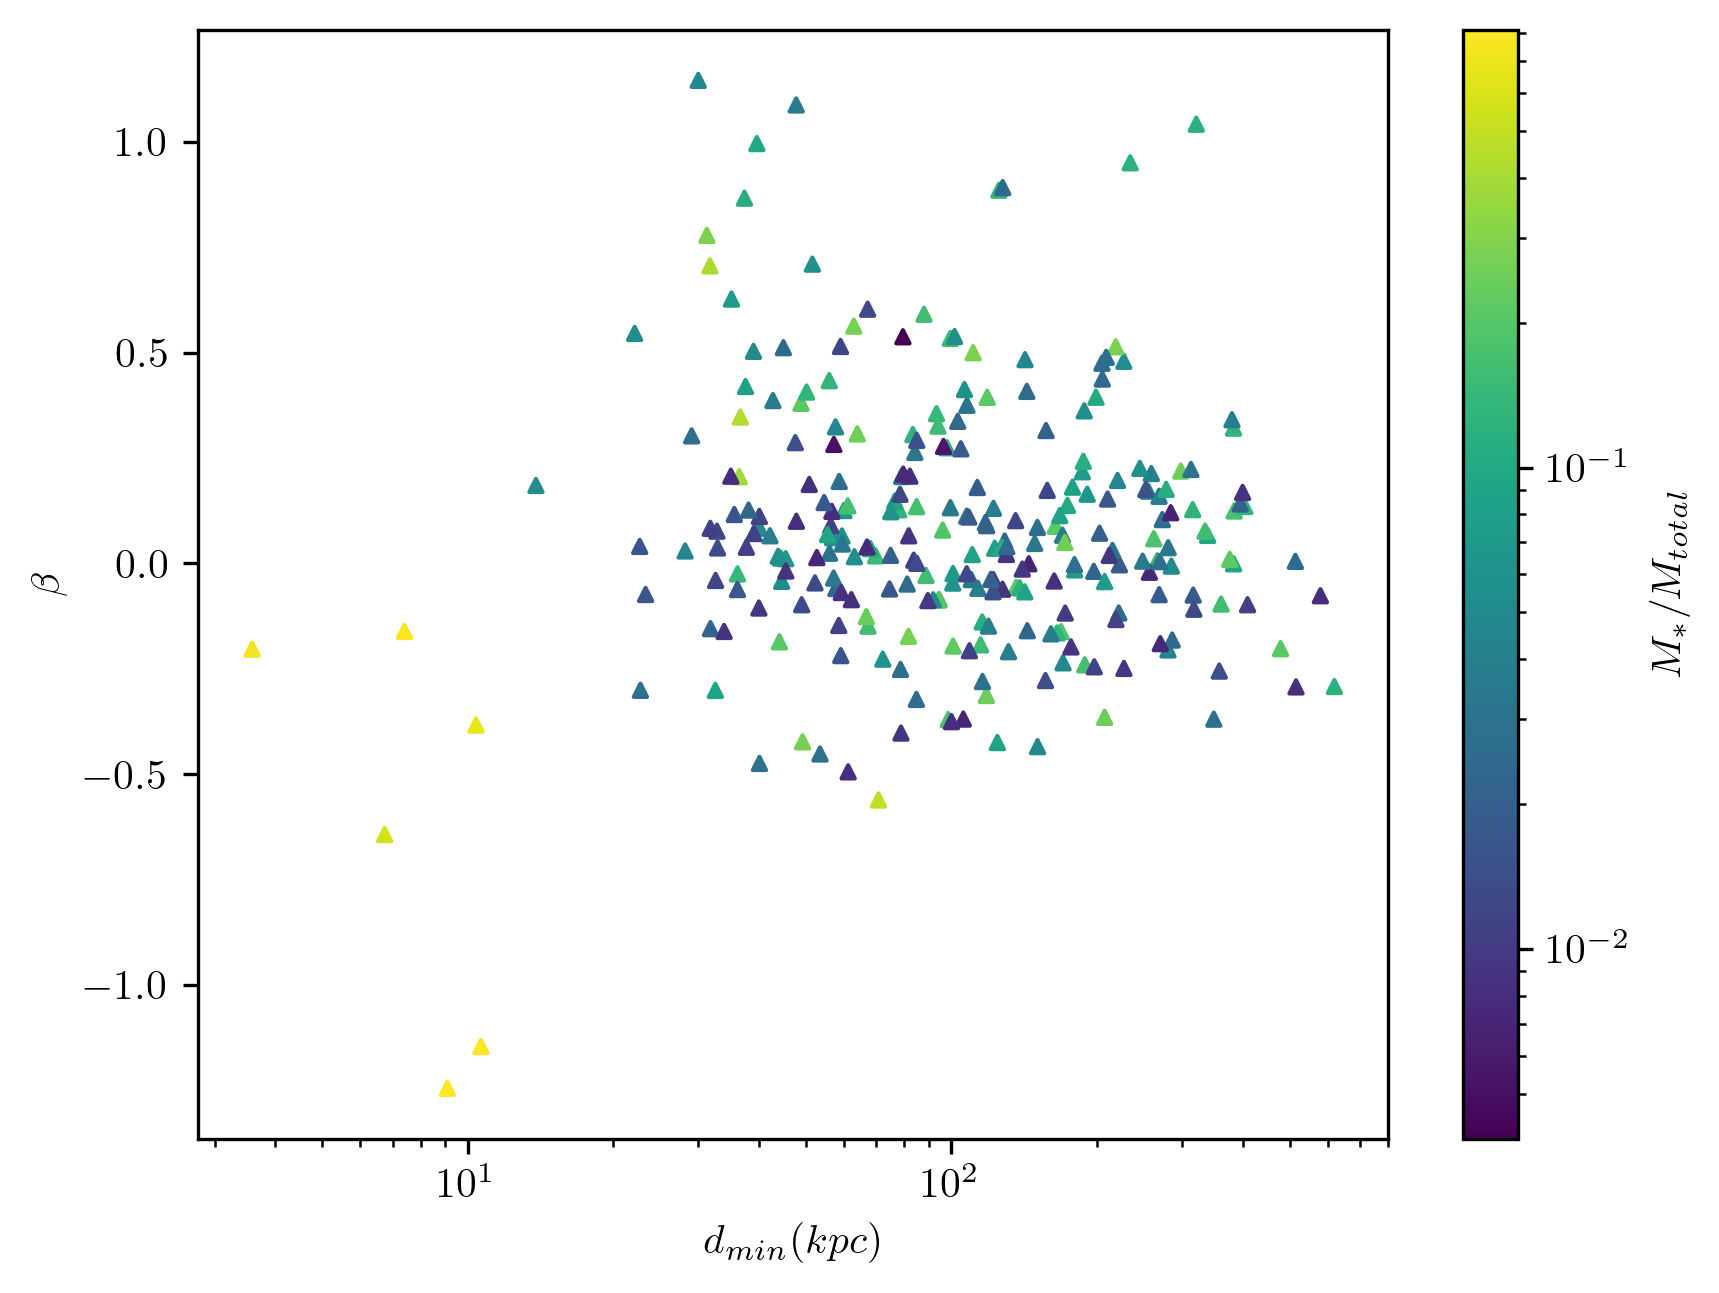

In [21]:



fig, ax = plt.subplots()

ax.set_xscale('log')


filt = dat['is_satellite'] & (dat['d_innermost'] != 0) & (dat['stars_mass_within_r50_stars'] <= 1e9)

c = dat[filt]['stars_mass_within_r50_stars'] / dat[filt]['M_tot']

_scatter = ax.scatter(
    dat[filt]['d_innermost'],
    dat[filt]['beta_r50'],
    s=10,
    marker='^',
    c=c,
    # log scale for colors
    norm=mpl.colors.LogNorm(np.min(c), np.max(c))
)

cbar = fig.colorbar(_scatter, ax=ax)
cbar.set_label(r'$M_*/M_{total}$')

ax.set_xlabel(r'$d_{min} (kpc)$')
ax.set_ylabel(r'$\beta$')


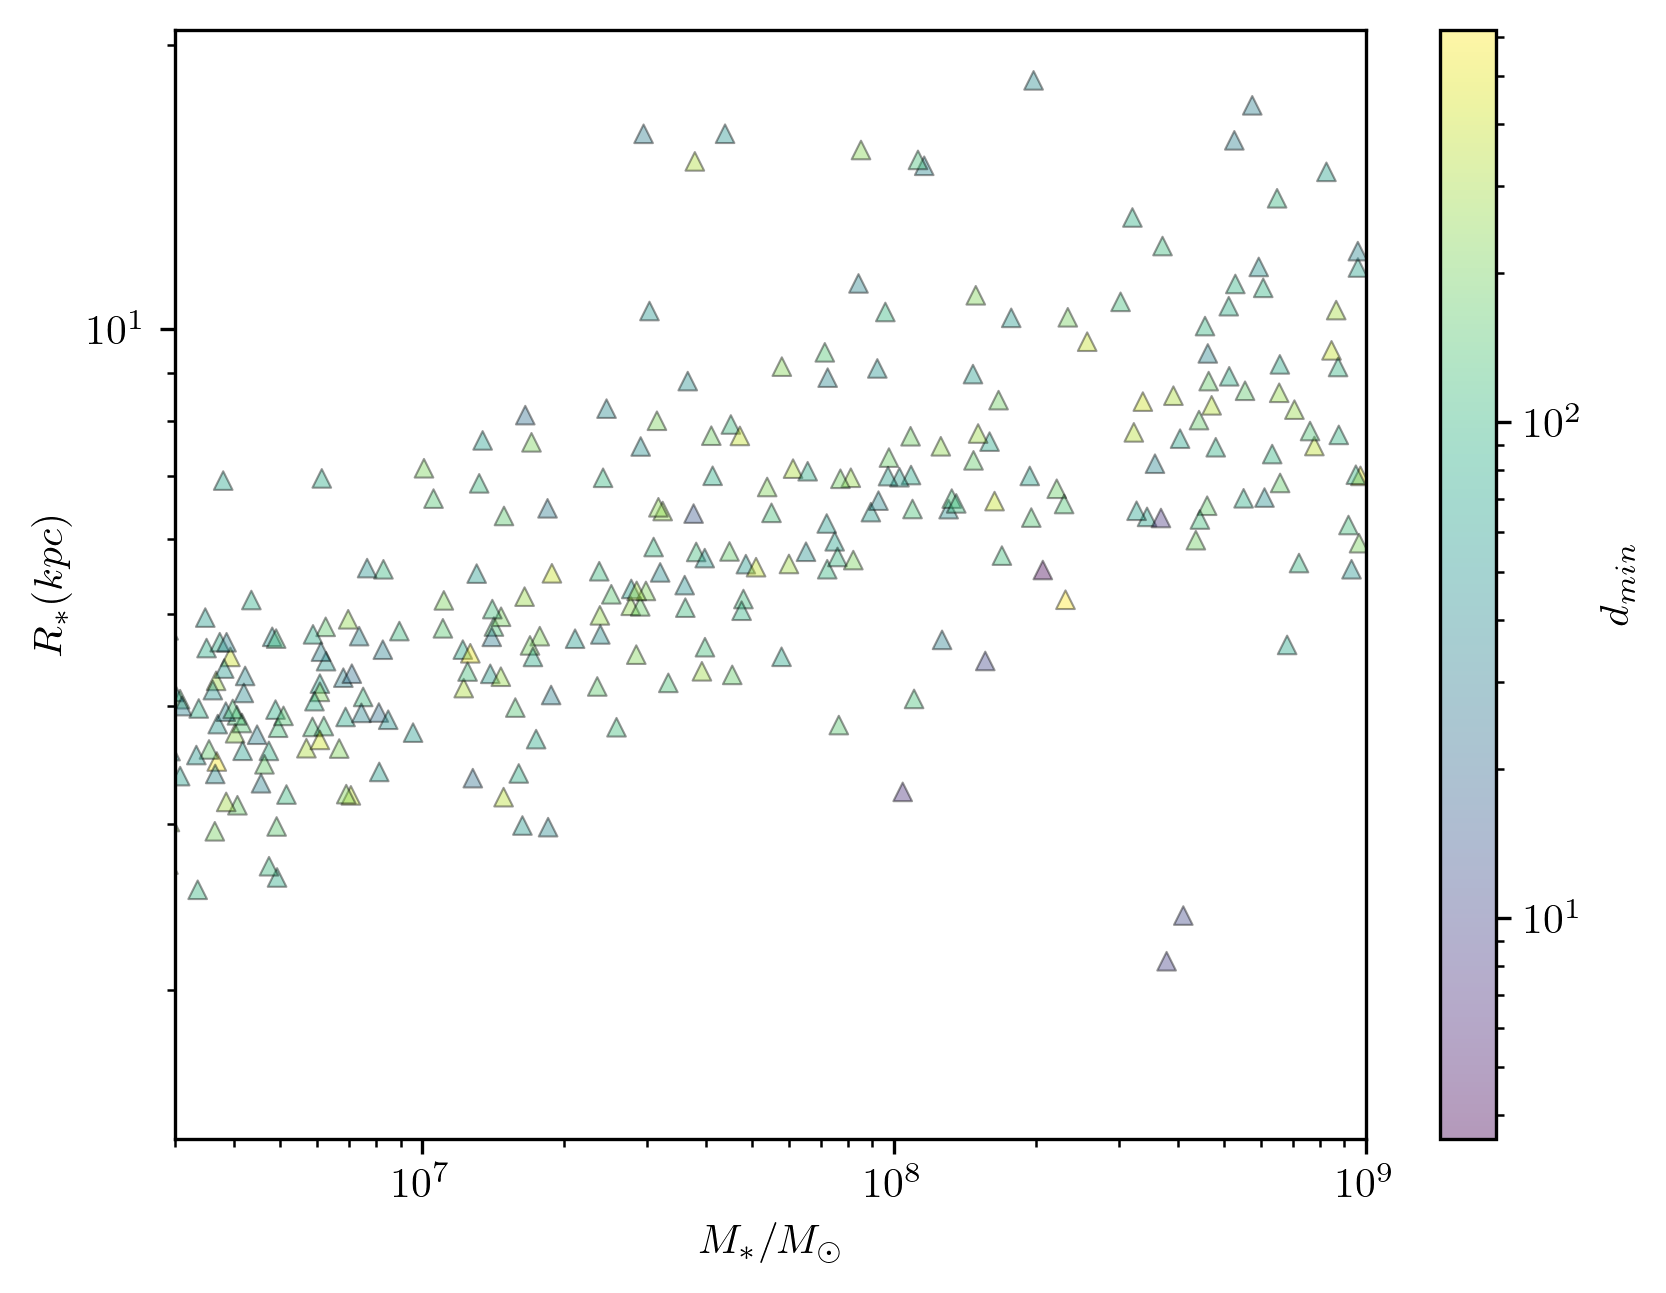

In [26]:

fig = plt.figure()
ax = plt.axes()

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(3e6, 1e9)

ax.set_xlabel(r'$M_{*} / M_\odot$')
ax.set_ylabel(r'$R_{*} (kpc)$')
d = dat
x, y = d[filt]['stars_mass_within_r50_stars_ahf'], d[filt]['r50_stars_ahf'] / h

c=d[filt]['d_innermost']

_m = ax.scatter(x, y, alpha=0.4, s=20, marker='^',
                edgecolor='black', linewidth=0.5,
                c=c,
                norm=mpl.colors.LogNorm(np.min(c), np.max(c))
                )
fig.colorbar(_m, ax=ax).set_label(r'$d_{min}$')